In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [174]:
df = pd.read_csv('data/final.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22534 non-null  int64  
 1   company_permalink  22534 non-null  object 
 2   company_name       22534 non-null  object 
 3   homepage_url       22534 non-null  object 
 4   category_list      22534 non-null  object 
 5   funding_total_usd  22534 non-null  object 
 6   status             22534 non-null  object 
 7   country_code       22534 non-null  object 
 8   state_code         22534 non-null  object 
 9   region             22534 non-null  object 
 10  city               22534 non-null  object 
 11  funding_rounds     22534 non-null  int64  
 12  founded_at         22534 non-null  object 
 13  first_funding_at   22534 non-null  object 
 14  last_funding_at    22534 non-null  object 
 15  is_roundA          22534 non-null  float64
 16  is_roundB          225

In [176]:
df.isnull().sum()

Unnamed: 0            0
company_permalink     0
company_name          0
homepage_url          0
category_list         0
funding_total_usd     0
status                0
country_code          0
state_code            0
region                0
city                  0
funding_rounds        0
founded_at            0
first_funding_at      0
last_funding_at       0
is_roundA             0
is_roundB             0
is_roundC             0
is_roundD             0
is_roundE             0
is_roundF             0
is_roundG             0
is_roundH             0
roundA                0
roundB                0
roundC                0
roundD                0
roundE                0
roundF                0
roundG                0
roundH                0
investor_count        0
ease_of_business      0
tai                  17
dtype: int64

In [177]:
df.drop(['founded_at','company_permalink','homepage_url','region','city','state_code'],inplace=True,axis=1)

In [178]:
df.isnull().sum()

Unnamed: 0            0
company_name          0
category_list         0
funding_total_usd     0
status                0
country_code          0
funding_rounds        0
first_funding_at      0
last_funding_at       0
is_roundA             0
is_roundB             0
is_roundC             0
is_roundD             0
is_roundE             0
is_roundF             0
is_roundG             0
is_roundH             0
roundA                0
roundB                0
roundC                0
roundD                0
roundE                0
roundF                0
roundG                0
roundH                0
investor_count        0
ease_of_business      0
tai                  17
dtype: int64

In [179]:
df.dropna(inplace=True)

In [180]:
df.isnull().sum()

Unnamed: 0           0
company_name         0
category_list        0
funding_total_usd    0
status               0
country_code         0
funding_rounds       0
first_funding_at     0
last_funding_at      0
is_roundA            0
is_roundB            0
is_roundC            0
is_roundD            0
is_roundE            0
is_roundF            0
is_roundG            0
is_roundH            0
roundA               0
roundB               0
roundC               0
roundD               0
roundE               0
roundF               0
roundG               0
roundH               0
investor_count       0
ease_of_business     0
tai                  0
dtype: int64

In [181]:
df.shape[0]

22517

In [182]:
print(df['status'].value_counts())
df.drop(['category_list','company_name'],inplace=True,axis=1)
df.replace({'status':{'acquired':1,'operating':1,'closed':0,'ipo':1}},inplace=True)

operating    18488
acquired      2188
closed        1383
ipo            458
Name: status, dtype: int64


In [183]:
subs = df[df['status'] == 1]
series = subs['country_code'].value_counts()

all_countries= df['country_code'].value_counts()

print(series)

dict = {}

cumsum = 0

for i in range(series.shape[0]):
    dict[series.index[i]] = series[i]
    cumsum += series[i]
    
for i in range(all_countries.shape[0]):
    if all_countries.index[i] not in dict:
        dict[all_countries.index[i]] = 0


df['country_val'] = df['country_code'].apply(lambda x: dict[x]/cumsum)

df.drop(['country_code'],inplace=True,axis=1)


USA    13055
GBR     1476
IND      709
CAN      636
FRA      491
       ...  
ALB        1
MDA        1
TUN        1
NPL        1
PRY        1
Name: country_code, Length: 88, dtype: int64


EDA

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
df = df[df['first_funding_at'] >= '1980-01-01']
df['first_funding_at'] = df['first_funding_at'].str.translate({ord(i): None for i in '-'})
df['last_funding_at'] = df['last_funding_at'].str.translate({ord(i): None for i in '-'})

df['first_funding_at'] = df['first_funding_at'].astype('int64')
df['last_funding_at'] = df['last_funding_at'].astype('int64')

In [186]:
# df['funding_total_usd'] = df['funding_total_usd'].astype(int)
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-','-1')
df['funding_total_usd'] = df['funding_total_usd'].astype('float64')

df = df[df['ease_of_business'] != '—']
df = df[df['ease_of_business'] != '128*']

df['ease_of_business'] = df['ease_of_business'].astype('float64')
df['tai'] = df['tai'].astype('float64')
df = df[df['funding_total_usd'] > 0]

print(df['status'].value_counts())

1    21090
0     1381
Name: status, dtype: int64


In [187]:
# pip install imbalanced-learn

In [188]:
from imblearn import under_sampling, over_sampling,combine
from sklearn.utils import shuffle

# df_1 = df[df['status']==1]
# df_0 = df[df['status']==0]

# df_1 = df_1.iloc[:int(df_0.shape[0]*0.099),:]

# df_1 = shuffle(df_1)

# df = pd.concat([df_1,df_0],axis=0)

print(df['status'].value_counts())

ov = over_sampling.SMOTE(sampling_strategy=0.29)
df_x,df_y = ov.fit_resample(df.drop(['status'],axis=1),df['status'])

df = pd.concat([df_x,df_y],axis=1)

print(df['status'].value_counts())

uv = under_sampling.RandomUnderSampler(sampling_strategy='majority')
df_x,df_y = uv.fit_resample(df.drop(['status'],axis=1),df['status'])

df = pd.concat([df_x,df_y],axis=1)

print(df['status'].value_counts())

# df = df.drop(['ease_of_business'],axis=1)



1    21090
0     1381
Name: status, dtype: int64
1    21090
0     6116
Name: status, dtype: int64
0    6116
1    6116
Name: status, dtype: int64


In [189]:
## box plot using seaborn
import seaborn as sns

<AxesSubplot:>

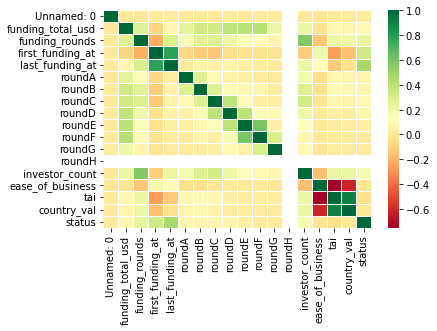

In [190]:
corr = df.drop(['is_roundA','is_roundB','is_roundC','is_roundD','is_roundE','is_roundF','is_roundG','is_roundH'],axis=1).corr()
sns.heatmap(corr,cmap='RdYlGn',linewidths=0.50)

Scatter Plot"

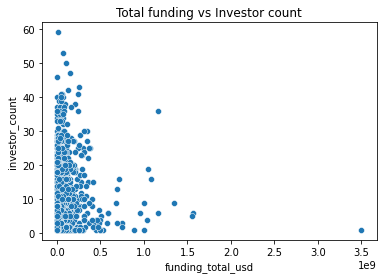

In [191]:
sns.scatterplot(x=df['funding_total_usd'],y=df['investor_count'],data=df)
plt.xlabel('funding_total_usd')
plt.ylabel('investor_count')
plt.title("Total funding vs Investor count")
plt.show()

In [192]:
# sns.scatterplot(x=df['investor_count'],y=df['ease_of_business'],data=df)
# plt.xlabel('investor_count')
# plt.ylabel('Ease of doing business')
# plt.title("investor_count vs country_val")
# plt.show()

Removing Outliers

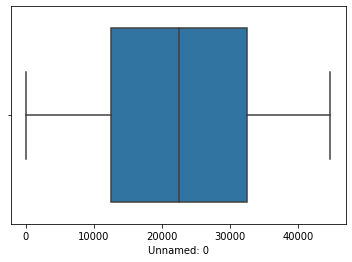

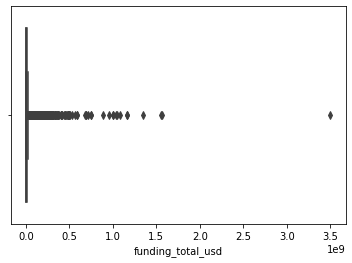

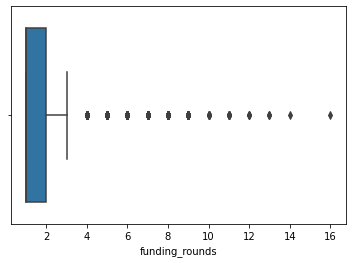

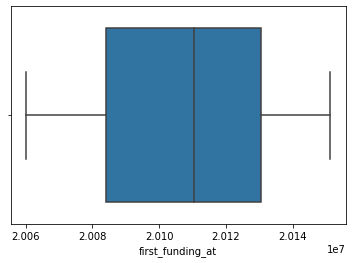

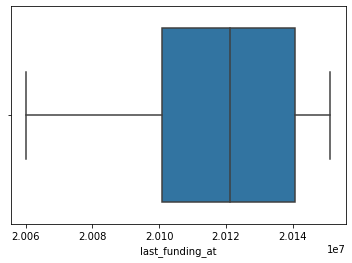

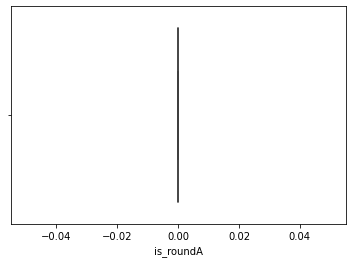

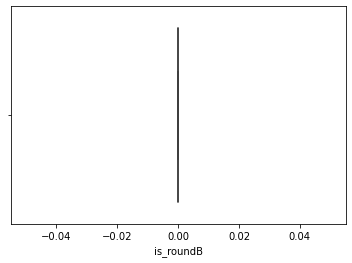

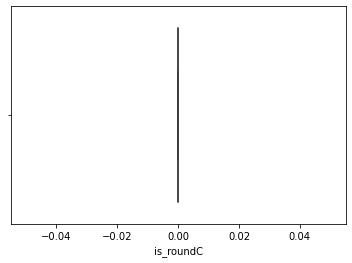

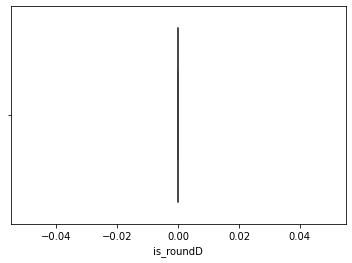

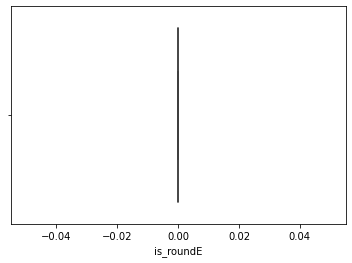

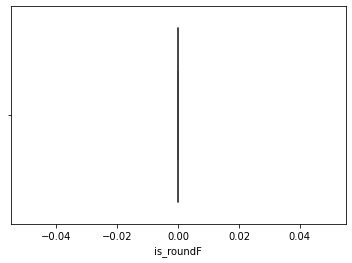

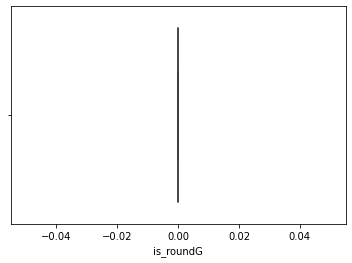

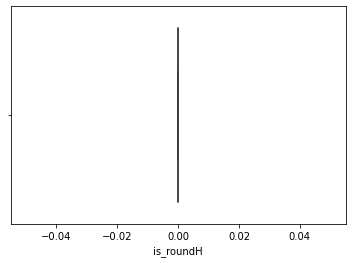

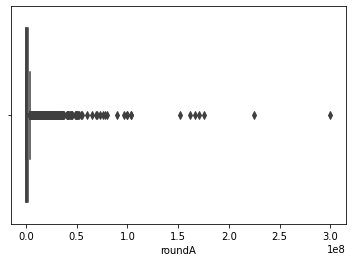

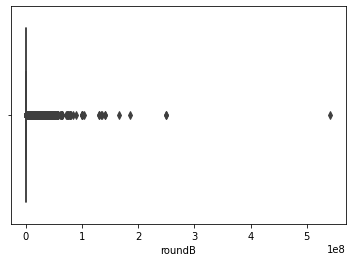

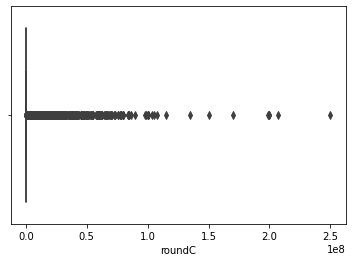

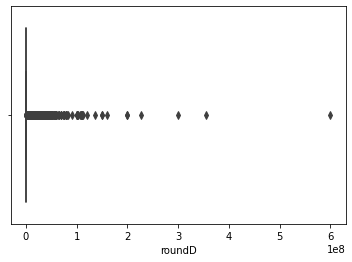

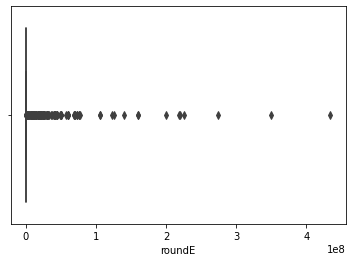

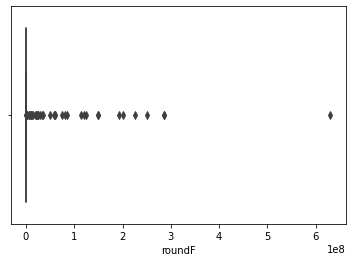

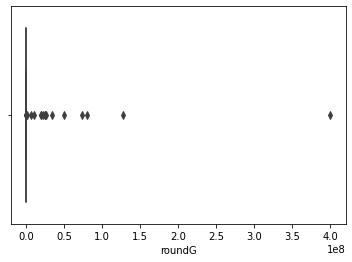

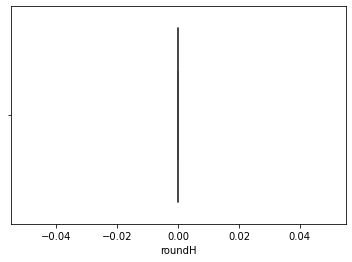

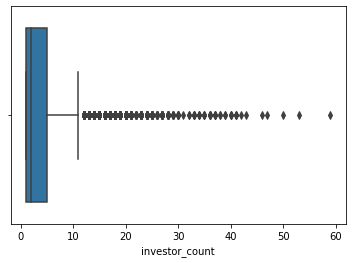

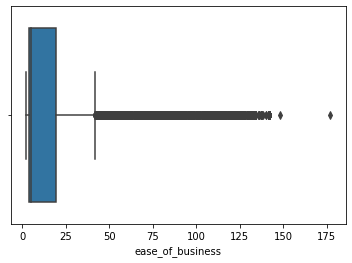

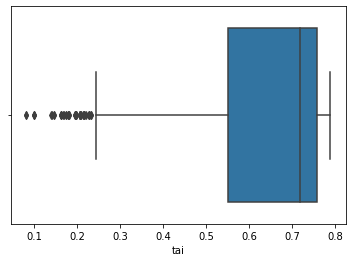

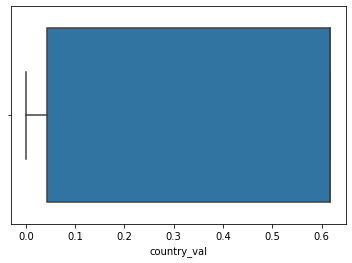

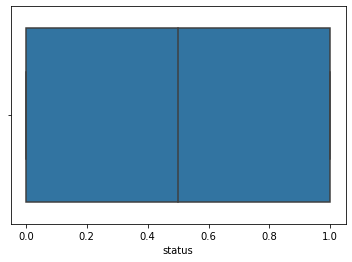

In [193]:
for i in df.columns : 
    sns.boxplot(data = df,x = df[i])
    plt.show()

In [194]:
Q1 = df['tai'].quantile(0.25)
Q3 = df['tai'].quantile(0.75)

IQR = Q3 - Q1

df = df[(df['tai'] >= (Q1 - 1.5 * IQR)) | (df['tai'] <= (Q3 + 1.5 * IQR))]

Scaling

In [195]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(['status'],axis=1))

# df = pd.DataFrame(scaled_data,columns=df.columns[:-1])

In [196]:
# df[['investor_count','first_funding_at','last_funding_at','funding_rounds']].plot(kind='box',title='box plot')
# plt.show()

PCA


Number of components :  0 , Ratio :  0
Number of components :  1 , Ratio :  0.48008242186246586
Number of components :  2 , Ratio :  0.7422595188359455
Number of components :  3 , Ratio :  0.8862500203165593
Number of components :  4 , Ratio :  0.9350383296439958
Number of components :  5 , Ratio :  0.9740932597053616
Number of components :  6 , Ratio :  0.9832377550257272
Number of components :  7 , Ratio :  0.9890310989495911
Number of components :  8 , Ratio :  0.9935530126812125
Number of components :  9 , Ratio :  0.9961147037351991
Number of components :  10 , Ratio :  0.9973376675581207
Number of components :  11 , Ratio :  0.9983819109473262
Number of components :  12 , Ratio :  0.99893252574588
Number of components :  13 , Ratio :  0.999328704010538
Number of components :  14 , Ratio :  0.9996700339017244
Number of components :  15 , Ratio :  0.9998807448794962
Number of components :  16 , Ratio :  1.0
Number of components :  17 , Ratio :  1.0000000000000009
Number of componen

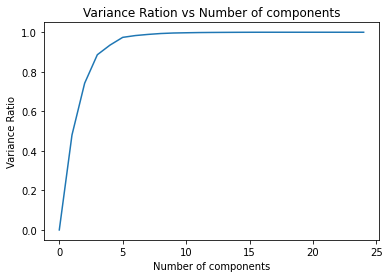

In [197]:
from sklearn.decomposition import PCA

n_comp = []
ratio = []

for i in range(len(scaled_data[0])) : 
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    
    ratio.append(sum(pca.explained_variance_ratio_))
    n_comp.append(i)
    print("Number of components : ",i,", Ratio : ",sum(pca.explained_variance_ratio_))
    
plt.plot(n_comp,ratio)
plt.xlabel("Number of components")
plt.ylabel("Variance Ratio")
plt.title("Variance Ration vs Number of components")
plt.show()


pca = PCA(n_components=16)
pca.fit(scaled_data)
scaled_data = pca.transform(scaled_data)

    

In [198]:
# from sklearn.manifold import TSNE

# tsne = PCA(n_components=2,perplexity=50)

# subdata =  tsne.fit_transform(scaled_data)
# sns.scatterplot(x=subdata[:,0],y=subdata[:,1],hue=df['status'])

In [199]:
from sklearn.model_selection import train_test_split


x = scaled_data
y = df['status'].to_numpy()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(9785, 16)
(2447, 16)
(9785,)


In [200]:
def get_metrics(y_out,y_test,y_pred_proba,lg,x_test,decision_boundary=False) : 
    accuracy = metrics.accuracy_score(y_test,y_out)
    recall = metrics.recall_score(y_test,y_out)
    precision = metrics.precision_score(y_test,y_out)
    f1 = metrics.f1_score(y_test,y_out)

    print("Accuracy : ",accuracy)
    print("Recall : ",recall)
    print("Precision : ",precision)
    print("F1 : ",f1)
    
        ##ROC AUC Curve
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_out)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Curve")

    auc = metrics.roc_auc_score(y_test, y_out)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    if decision_boundary : 
        for i in range(len(x_test[0])) : 
            temp = x_test[:,i]
            # plt.plot(temp,y_test,'x',label="Actual",c='b')
            # plt.plot(temp,y_pred,'o',label="Actual",c='r')

            bias = lg.intercept_[0]
            weights = lg.coef_[0]
            out = bias + weights[i]*temp
            
            xmin = -10
            xmax = 10
            ymin = -10
            ymax = 10
            
            xd = np.array([xmin, xmax])
            yd = weights[i]*xd + bias
            plt.plot(xd, yd, 'k', lw=1, ls='--')
            plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
            plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

            plt.scatter(x = temp[y_test==0],y = y_test[y_test==0], c='orange')
            plt.scatter(x = temp[y_test==1],y = y_test[y_test==1], c='b')
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            plt.ylabel(r'$x_2$')
            plt.xlabel(r'$x_1$')
            # plt.plot(temp,out,label="Predicted")
            # plt.xlabel("Feature "+str(i+1))
            # plt.ylabel("Probability")
            plt.title("Decision Boundary for feature : "+str(i+1))
            plt.show()
        

Logistic Regression Model

c:\Users\ATHARVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ATHARVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

tuned hyperparameters :  {'C': 3.7649358067924674}
accuracy : 0.7417488313070516
------------------------------------------------------------------------------
Accuracy :  0.7392725786677564
Recall :  0.7456556082148499
Precision :  0.7492063492063492
F1 :  0.7474267616785432


c:\Users\ATHARVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ATHARVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

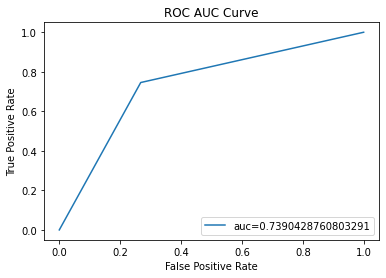

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg_cv = LogisticRegression()

gs = GridSearchCV(lg_cv,{'C':np.logspace(-3,3,100)},cv=3)
gs.fit(x_train,y_train)

print("tuned hyperparameters : ",gs.best_params_)
print("accuracy :",gs.best_score_)
print("------------------------------------------------------------------------------")

# lg = LogisticRegression(C=gs.best_params_['C'],penalty="l2")
# lg.fit(x_train,y_train)

# y_out = lg.predict(x_test)
# y_pred_proba = lg.predict_proba(x_test)[::,1]
y_out = gs.predict(x_test)
y_pred_proba = gs.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs,x_test,False)

Naive Bayes Model

Gaussian Naive Bayes

In [202]:
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gs_gnb = GridSearchCV(GaussianNB(),param_grid_nb,cv=5)
gs_gnb.fit(x_train,y_train)

print("tuned hyperparameters : ",gs_gnb.best_params_)
print("accuracy :",gs_gnb.best_score_)
print("------------------------------------------------------------------------------")

# gnb = GaussianNB(var_smoothing=gs_gnb.best_params_['var_smoothing'])
# gnb.fit(x_train,y_train)
# y_out = gnb.predict(x_test)
# y_pred_proba = gnb.predict_proba(x_test)[::,1]

y_out = gs_gnb.predict(x_test)
y_pred_proba = gs_gnb.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs_gnb,x_test)


KeyboardInterrupt: 

Bernoulli Naive Bayes

Accuracy :  0.7098487944421741
Recall :  0.7148499210110585
Precision :  0.7216905901116427
F1 :  0.7182539682539683


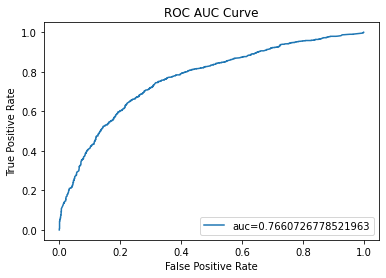

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# param_grid_nb = {
#     'var_smoothing': np.logspace(0,-9, num=100)
# }

# gs_bnb = GridSearchCV(BernoulliNB(),param_grid_nb,cv=5)
# gs_bnb.fit(x_train,y_train)

# print("tuned hyperparameters : ",gs_bnb.best_params_)
# print("accuracy :",gs_bnb.best_score_)
# print("------------------------------------------------------------------------------")

bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_out = bnb.predict(x_test)
y_pred_proba = bnb.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,bnb,x_test)

Decision Tree

Classifier Without pruning 

tuned hyperparameters :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
accuracy : 0.7910066428206438
------------------------------------------------------------------------------
Accuracy :  0.7911728647323253
Recall :  0.7424960505529226
Precision :  0.8355555555555556
F1 :  0.7862818904224174


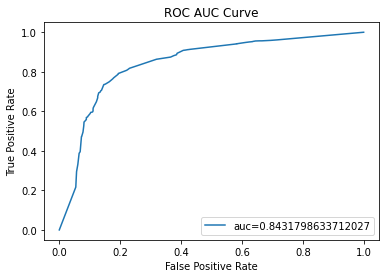

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_gs = DecisionTreeClassifier()
gs = GridSearchCV(dt_gs,{'max_depth': [5,6,8,10,12,20,22,25,50,100],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'criterion':('gini','entropy')},cv=5)
gs.fit(x_train,y_train)

print("tuned hyperparameters : ",gs.best_params_)
print("accuracy :",gs.best_score_)
print("------------------------------------------------------------------------------")

y_out = gs.predict(x_test)
y_out_proba = gs.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_out_proba,gs,x_test)

In [ ]:
#using graphviz to visualize the decision tree
# import graphviz
# from sklearn.tree import export_graphviz
# # DOT data
# dot_data = export_graphviz(gs, out_file=None, 
#                                 feature_names=df.iloc[:,0:-1].columns,  
#                                 class_names=None,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph.render("dtree_render")


tuned hyperparameters :  {'n_estimators': 1000}
accuracy : 0.8204394481349002
------------------------------------------------------------------------------
Accuracy :  0.8344912137310994
Recall :  0.7819905213270142
Precision :  0.8847184986595175
F1 :  0.8301886792452831


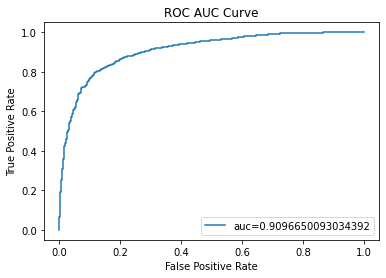

In [ ]:
from sklearn.ensemble import RandomForestClassifier

gs_rfc = RandomForestClassifier(min_samples_leaf=gs.best_params_['min_samples_leaf'],min_samples_split=gs.best_params_['min_samples_split'],max_depth=gs.best_params_['max_depth'],criterion=gs.best_params_['criterion'])
gs_rf = GridSearchCV(gs_rfc,{'n_estimators': [10,100,200,400,500,600,800,1000,1500]},cv=5)
gs_rf.fit(x_train,y_train)

print("tuned hyperparameters : ",gs_rf.best_params_)
print("accuracy :",gs_rf.best_score_)
print("------------------------------------------------------------------------------")

y_out = gs_rf.predict(x_test)
y_pred_proba = gs_rf.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs_rf,x_test)

In [ ]:
from sklearn.svm import SVC  

param = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.01, 0.001], 'degree' :[3,5], 'kernel': ['rbf', 'linear', 'poly']}
gridSVM = GridSearchCV(SVC(), param, refit = True)
gridSVM.fit(x_train, y_train)

print("tuned hyperparameters : ",gridSVM.best_params_)
print("accuracy :",gridSVM.best_score_)
print("------------------------------------------------------------------------------")

y_out = gridSVM.predict(x_test)
y_pred_proba = []

get_metrics(y_out,y_test,y_pred_proba,gridSVM,x_test)

tuned hyperparameters :  {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.794685743484926
------------------------------------------------------------------------------


AttributeError: predict_proba is not available when  probability=False